In [1]:
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
#import ipd

In [2]:
# y is np.ndarray. [shape=(n,) or (2, n)]
# sr is sampling rate of y
y, sr = librosa.load(librosa.util.example_audio_file())
print(y.shape)
print(sr)

(1355168,)
22050


### Plot all wave

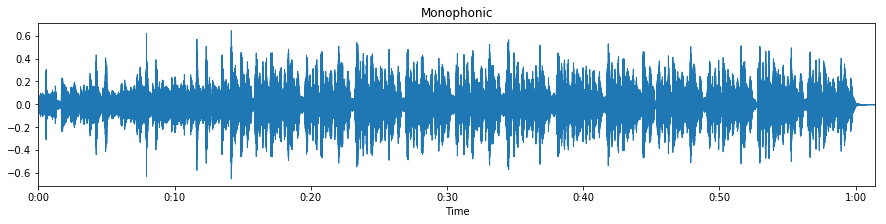

In [3]:
plt.figure(figsize=(15,3))
plt.subplot(1, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic')

### Play sound data

In [4]:
ipd.Audio(y, rate=sr)

### Plot a part of duration  (method 1) - load file w/ specific duration

In [5]:
#y, sr = librosa.load(librosa.util.example_audio_file(),duration=0.5)

#plt.figure(figsize=(15,3))
#plt.subplot(1, 1, 1)
#librosa.display.waveplot(y, sr=sr)
#plt.title('Monophonic')

### Plot specific time wave [wave this time is up]

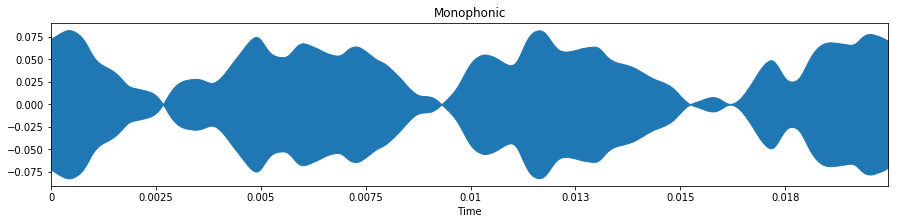

In [31]:
t_beg = 0.2;
t_dur = 0.02
plt.figure(figsize=(15,3))
plt.subplot(1, 1, 1)
librosa.display.waveplot(y[int(t_beg*sr):int((t_beg+t_dur)*sr)], sr=sr) #,alpha=0.1
plt.title('Monophonic')

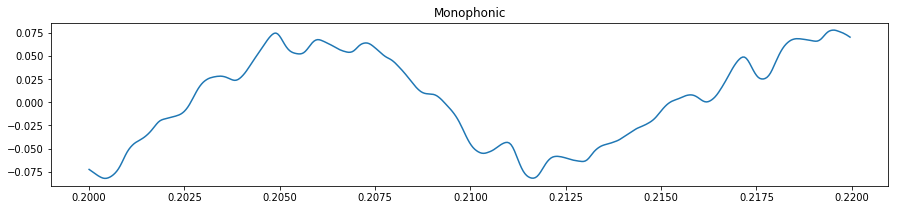

In [32]:
t_beg = 0.2;
t_dur = 0.02
plt.figure(figsize=(15,3))
plt.subplot(1, 1, 1)
plt.plot(np.arange(t_beg, t_beg+t_dur, 1.0/sr), y[int(t_beg*sr):int((t_beg+t_dur)*sr)])
plt.title('Monophonic')

### How many sample in this duration

In [7]:
sample_num = t_dur * sr
print(int(sample_num))

441


### Decompose an audio time series into harmonic and percussive components

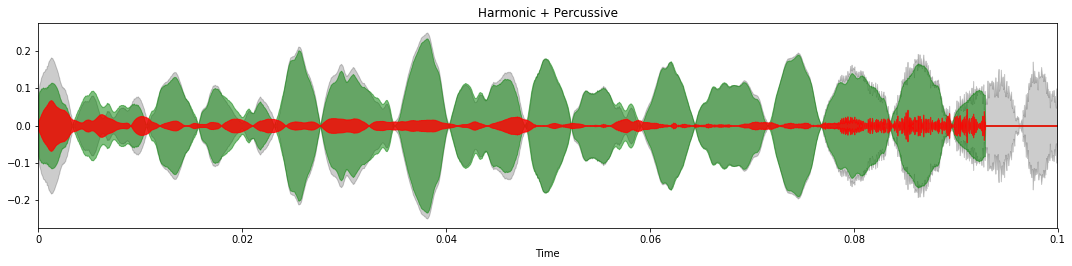

In [12]:
dur_start = 10 # second
dur = 0.1 # second
yy = y[int(dur_start*sr):int((dur_start+dur)*sr)]
y_harm, y_perc = librosa.effects.hpss(yy)
plt.figure(figsize=(15,10))
plt.subplot(3, 1, 3)
librosa.display.waveplot(yy, sr=sr, color='black', alpha=0.2)
librosa.display.waveplot(y_harm, sr=sr, color='g', alpha=0.5)
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.8)
plt.title('Harmonic + Percussive')
plt.tight_layout()

### Pitch tracking

- ptiches: np.ndarray[shape=(d,t)]<br>
- magnitudes: np.ndarray[shape=(d,t)]<br>

d is the subset of FFT bins within *fmin* and *fmax*.<br>
*pitches[f, t]* contains instantaneous frequency at bin *f*, time *t*
*magnitudes[f, t]* contains the corresponding magnitudes

In [14]:
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

print(pitches.shape)
print(magnitudes)

(1025, 2647)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
